In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from tree_search_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra

## Initialize and Load Data

In [7]:
#This block of code creates random concentrations and spectra to start the algorithm.
Sample_concentrations = pd.read_excel('Sample_concentrations.xlsx')
red_conc = Sample_concentrations[['Red vol frac']].values
green_conc = Sample_concentrations[['Green vol frac']].values
blue_conc = Sample_concentrations[['Blue vol frac']].values
sample_conc = np.hstack((red_conc, green_conc, blue_conc))

sample_spectra = pd.read_excel('Sample_spectra.xlsx')
sample_spectra = np.asarray(sample_spectra)
red = sample_spectra[:,1]
green = sample_spectra[:,2]
blue = sample_spectra[:,3]
wavelength = sample_spectra[:,0]


################ INPUTS #####################################################################
np.random.seed(2)
conc_array = np.random.dirichlet((1, 1,1), 7) #First concentration array to test 
spectra_array = conc_to_spectra(conc_array, sample_spectra[:,1:conc_array.shape[1]+1]) #spectra of the first conc array
#############################################################################################

conc_array_actual = conc_array
spectra_array_actual = spectra_array

#Change Desired Spectra 
objective_row = -1
##################### INPUT ################################################################
x_test = sample_spectra[:,objective_row].reshape(-1,1) #Target spectra
############################################################################################
target_conc = sample_conc[objective_row,:]
print(target_conc)



[0.5073313  0.01445543 0.47821328]


In [8]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    '''Simulates beers law in samples from next_gen_conc'''
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

## Analyze Fitness of Zeroth Iteration

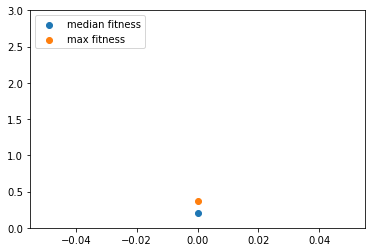

The max fitness is: 0.36857973089843177
The median fitness is: 0.21042007102320298


In [9]:
next_gen_conc, current_gen_spectra, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, mutation_rate_list_2 = zeroth_iteration(conc_array, spectra_array, x_test)

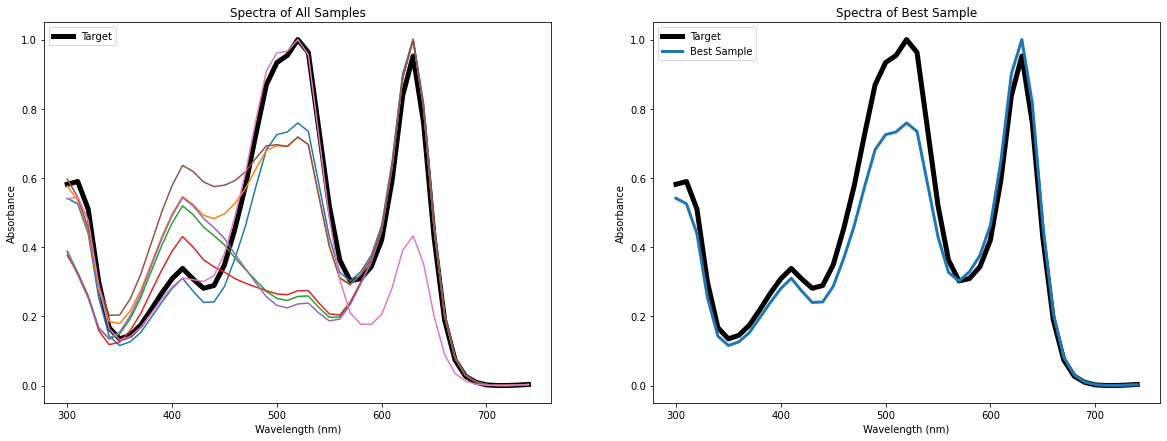

In [10]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration, False)

## Nth Iteration 

Run the code starting from here to the end for every nth iteration. 

In [11]:
Iterations = 25 #sample size for GA 
Moves_ahead = 3 #moves ahead that are calculated 
GA_iterations = 6 #times per move that the GA is used 
n_samples = 7 #sample size
seed = np.random.randint(1,100,1)[0]
mutation_rate, mutation_rate_2, mutation_rate_list, mutation_rate_list_2, best_move, best_move_turn, max_fitness, surrogate_score, next_gen_conc, best_conc_array, dictionary_of_moves = nth_iteration(Iterations, Moves_ahead, GA_iterations, n_samples, current_gen_spectra, next_gen_conc, x_test, conc_array_actual, spectra_array_actual, seed, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, mutation_rate_list_2)

The best move has a fitness value of 1.871180005094362
The best move occurs in 1 turns.

The surrogate model has a score of: 0.9999999999999809

[[0.37637638 0.35935936 0.26426426]
 [0.70629019 0.03086442 0.26284539]
 [0.52325119 0.27240219 0.20434662]
 [0.7047047  0.03103103 0.26426426]
 [0.34212921 0.41765241 0.24021838]
 [0.70494411 0.03100587 0.26405002]
 [0.69131692 0.03044151 0.27824156]]


In [12]:
next_gen_conc[-1,:] = best_conc_array[:-1]

In [13]:
current_gen_spectra, conc_array_actual, spectra_array_actual = perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual)

The max fitness is: 1.7249564859651436
The median fitness is: 0.30236625210138696


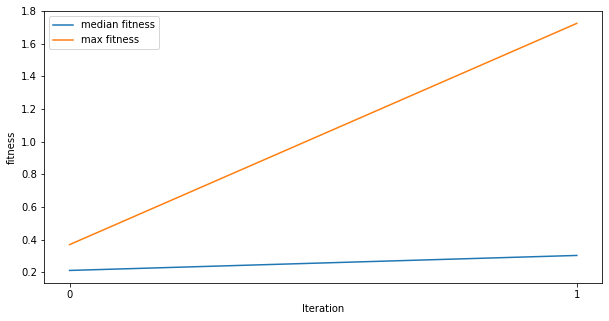

In [14]:
median_fitness_list, max_fitness_list, iteration = plot_fitness(next_gen_conc, current_gen_spectra, x_test, median_fitness_list, max_fitness_list, iteration, False)

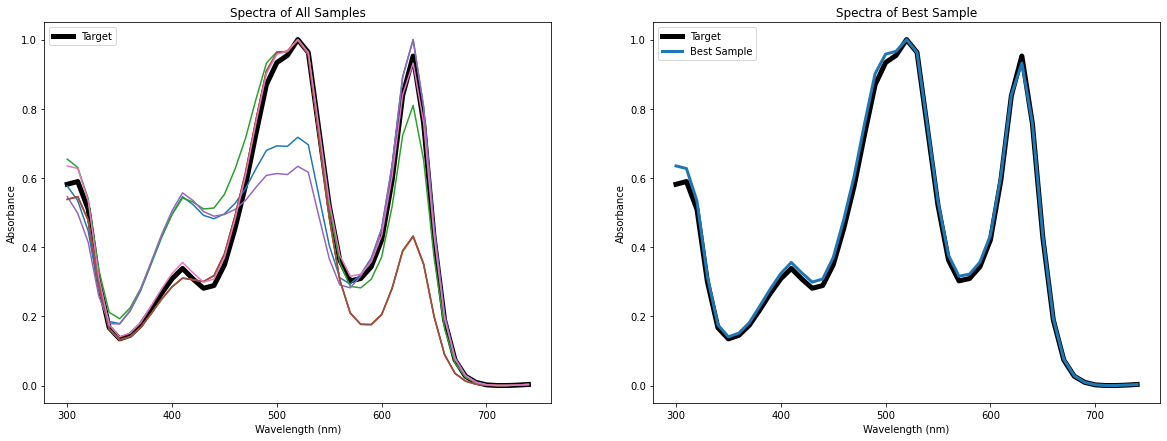

In [15]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration, False)